In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
for font_file in flist:
    if 'imbus' in font_file:
        # print(font_file)
        matplotlib.font_manager.fontManager.addfont(font_file)
# print(flist)
# plt.style.use('presentation')
# print([x for x in flist if 'imbus' in x])

font_prop = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-Regular.otf', size=14)

font = {'family' : 'Nimbus Roman',
        'size'   : 40}
        # 'weight' : 'bold',

# matplotlib.rc('font', **font)
# print(plt.rcParams.keys())
# params = {'figure.figsize': [5., 3.]}  # : 'sans-serif', 'font.sans-serif':
plt.rc('figure', figsize=(5.,3.))
figure_size = (4., 2.5)

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# from matplotlib.pyplot import rcParams
# print(rcParams['font.family'])
# print(rcParams['font.size'])
# rcParams['font.family'] = 'Nimbus Roman'
# rcParams['font.serif'] = 'Nimbus Roman'
# plt.rcParams.update(params)
# rcParams['lines.linewidth'] = 2
# rc('font',**{'family':'serif','serif':['NimbusRoman']})

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

figure_formats = ['eps', 'pdf', 'svg', 'png']

## Plotting DBSCAN results

In [2]:
with open('../results/results-dbscan.h5', 'rb') as file:
    (performance_dbscan, highest_f1) = pickle.load(file)

In [3]:
message_size_stateless = [24376, 32496, 42646, 54827, 62947, 73097, 83247, 93397, 103547,
113697, 123847, 133997, 174592, 215197]
avg_response_time_stateless = [0.0004,
        0.0003, 0.0021, 0.0017, 0.022,
        0.3458, 1., 1.0016, 1.0193, 1.2576, 2., 2.0125,
        3.38812, 5.18]
std_response_time_stateless = [0.02449,
        0.0223, 0.04995, 0.04579, 0.148,
        0.4768, 0.04689, 0.4469, 0.1706, 0.4391, 0.4344, 0.11377,
        0.709, 0.3952]

In [4]:
max_f1 = max([x for x in highest_f1.values()])

In [5]:
[x for x in highest_f1.values()]

[0.7107685835063442,
 0.749555923439602,
 0.7805602584162971,
 0.807836078376014,
 0.8273684919720514,
 0.8399414493275648,
 0.8551517898343747,
 0.8405456158988373,
 0.8577895800359598,
 0.8607761783359299,
 0.8625621178817171,
 0.8731358044642864,
 0.8711715102081229,
 0.8738989235719484]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


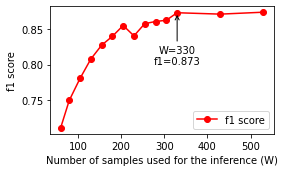

In [6]:
fig, ax1 = plt.subplots(figsize=figure_size)

s1 = ax1.plot([x+30 for x in highest_f1.keys()],
         [x for x in highest_f1.values()], color='red', label='f1 score', marker='o')

ax1.set_xlabel('Number of samples used for the inference (W)')
ax1.set_ylabel('f1 score')  #, color=s1[0].get_color())

ax1.legend(loc=4)

# ax2 = ax1.twinx()

plt.annotate('W=330\nf1=0.873',
             xy=(330, 0.873), xycoords='data',
             xytext=(330, .8), textcoords='data',
             horizontalalignment='center',
             color='black',alpha=1.,
             arrowprops=dict(arrowstyle='->'),
                zorder=20)

# s2 = ax2.plot([x+30 for x in highest_f1.keys()],
#          [x/1000/3.1 for x in message_size_stateless], ls='--', label='Message size')

# # s3 = ax2.plot([x+30 for x in highest_f1.keys()],
# #          [272/1000 for x in message_size_stateless], ls=':', label='Stateful', linewidth=2.8)

# ax2.set_ylabel('Detection request \nmessage size [KB]')
# plt.text(plt.xlim()[1]*.92, plt.ylim()[1]*.95, '(a)')

# ax2.legend(loc=4)
plt.tight_layout()
for fig_format in figure_formats:
    plt.savefig(f'../figures/f1_score_vs_message_size.{fig_format}')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


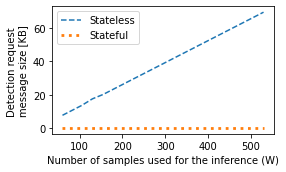

In [7]:
fig, ax1 = plt.subplots(figsize=figure_size)

# s1 = ax1.plot([x+30 for x in highest_f1.keys()],
#          [x for x in highest_f1.values()], color='red', label='f1 score', marker='o')

ax1.set_xlabel('Number of samples used for the inference (W)')
# ax1.set_ylabel('f1 score')  #, color=s1[0].get_color())

# ax1.legend(loc=4)

# ax2 = ax1.twinx()

# plt.annotate('W=330\nf1=0.873',
#              xy=(330, 0.873), xycoords='data',
#              xytext=(330, .8), textcoords='data',
#              horizontalalignment='center',
#              color='black',alpha=1.,
#              arrowprops=dict(arrowstyle='->'),
#                 zorder=20)

s2 = ax1.plot([x+30 for x in highest_f1.keys()],
         [x/1000/3.1 for x in message_size_stateless], ls='--', label='Stateless')

s3 = ax1.plot([x+30 for x in highest_f1.keys()],
         [272/1000 for x in message_size_stateless], ls=':', label='Stateful', linewidth=2.8)

ax1.set_ylabel('Detection request \nmessage size [KB]')
# plt.text(plt.xlim()[1]*.92, plt.ylim()[1]*.95, '(a)')

ax1.legend(loc=2)
plt.tight_layout()
for fig_format in figure_formats:
    plt.savefig(f'../figures/message_size.{fig_format}')

plt.show()

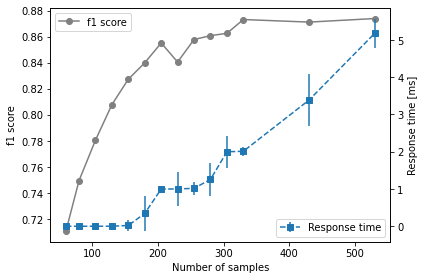

In [8]:
fig, ax1 = plt.subplots()

s1 = ax1.plot([x+30 for x in highest_f1.keys()],
         [x for x in highest_f1.values()], 
         color='gray', label='f1 score', marker='o')

ax1.set_xlabel('Number of samples')
ax1.set_ylabel('f1 score')  #, color=s1[0].get_color())

ax1.legend(loc=2)

ax2 = ax1.twinx()

s2 = ax2.errorbar([x+30 for x in highest_f1.keys()],
         [x for x in avg_response_time_stateless], 
         [x for x in std_response_time_stateless], 
         ls='--', label='Response time', marker='s')

# s3 = ax2.plot([x+30 for x in highest_f1.keys()],
#          [272/1000 for x in message_size_stateless], ls=':', label='Stateful', linewidth=2.8)

ax2.set_ylabel('Response time [ms]')

ax2.legend(loc=4)
plt.tight_layout()
# for fig_format in figure_formats:
#     plt.savefig(f'../figures/f1_score_vs_response_time.{fig_format}')

plt.show()

## Plotting replica vs. response time results

In [9]:
avg_response_time = {}
stdev_response_time = {}
for num_clients in [30, 60, 120, 240, 480, 960]:  #, 1920
    dataframe = pd.read_csv(f'../client/results/results-{num_clients}-1.csv', names=['response', 'ida', 'response_time'])
    for run in range(2, 11):
        # print(f'../client/results/results-{num_clients}-{run}.csv')
        df = pd.read_csv(f'../client/results/results-{num_clients}-{run}.csv')
        dataframe = dataframe.append(df)
    avg_response_time[num_clients] = dataframe['response_time'].mean()
    stdev_response_time[num_clients] = dataframe['response_time'].std()
print('Minimum:', min(avg_response_time.values()))
print('Maximum:', max(avg_response_time.values()))

Minimum: 5.6675775772176475
Maximum: 19.117936829904377


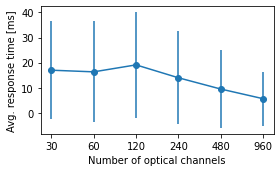

In [10]:
plt.figure(figsize=figure_size)

plt.errorbar(range(len(avg_response_time)), 
            [x for x in avg_response_time.values()], 
            [x for x in stdev_response_time.values()], 
            marker='o')
plt.xticks(range(len(avg_response_time)), [x for x in avg_response_time.keys()])
plt.xlabel('Number of optical channels')
plt.ylabel('Avg. response time [ms]')
# plt.text(plt.xlim()[1]*.92, plt.ylim()[1]*.85, '(c)')
plt.tight_layout()
for fig_format in figure_formats:
    plt.savefig(f'../figures/response_time_vs_number_clients.{fig_format}')
plt.show()

In [11]:
replicas_time = pd.read_csv('../client/results/replicas_final_until_960.csv', parse_dates=['time'])
print(replicas_time.head())
start = replicas_time.loc[0]['time']

                 time  utilization  currentreplicas  desiredreplicas
0 2021-10-14 05:11:17            0                2                2
1 2021-10-14 05:11:27            0                2                2
2 2021-10-14 05:11:37            0                2                2
3 2021-10-14 05:11:47            5                2                2
4 2021-10-14 05:11:58            5                2                2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


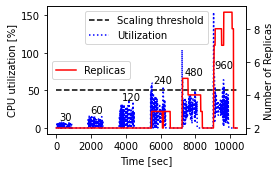

In [12]:
fig, ax1 = plt.subplots(figsize=figure_size)
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            [50 for x in replicas_time['utilization']], 
            label='Scaling threshold', ls='--', color='black')
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            replicas_time['utilization'], 
            label='Utilization', ls=':', color='blue')

text_indices = [30+881-30, 1835+2676-1835, 3619+4481-3619, 5435+6296-5435, 7240+8102-7240, 8950+9898-9036]

y_values = 10,20,37,60,70,80
for idr, num_clients in enumerate([30, 60, 120, 240, 480, 960]):  #, 1920
    plt.text(text_indices[idr]-700, y_values[idr], f'{num_clients}')

plt.xlabel('Time [sec]')
ax1.set_ylabel('CPU utilization [%]')
ax1.legend(loc=9)

ax2 = plt.gca().twinx()
# ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['desiredreplicas'], label='Desired', ls='--', linewidth=2, color='green')
ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['currentreplicas'], label='Replicas', ls='-', color='red')
ax2.legend(loc=6)
ax2.set_ylabel('Number of Replicas')
# ax2.text(ax2.get_xlim()[0], ax2.get_ylim()[1]*.9, '(b)')

plt.tight_layout()
xticks = plt.xticks()
# plt.xticks([(x - start).total_seconds() for x in replicas_time['time']], 
#            [str((x - start)) for x in replicas_time['time']])
for fig_format in figure_formats:
    plt.savefig(f'../figures/load_vs_replicas.{fig_format}')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


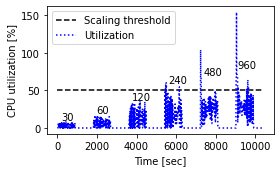

In [13]:
fig, ax1 = plt.subplots(figsize=figure_size)
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            [50 for x in replicas_time['utilization']], 
            label='Scaling threshold', ls='--', color='black')
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            replicas_time['utilization'], 
            label='Utilization', ls=':', color='blue')

text_indices = [30+881-30, 1835+2676-1835, 3619+4481-3619, 5435+6296-5435, 7240+8102-7240, 8950+9898-9036]

y_values = 10,20,37,60,70,80
for idr, num_clients in enumerate([30, 60, 120, 240, 480, 960]):  #, 1920
    plt.text(text_indices[idr]-700, y_values[idr], f'{num_clients}')

plt.xlabel('Time [sec]')
ax1.set_ylabel('CPU utilization [%]')
ax1.legend(loc=2)

plt.tight_layout()
xticks = plt.xticks()
# plt.xticks([(x - start).total_seconds() for x in replicas_time['time']], 
#            [str((x - start)) for x in replicas_time['time']])
for fig_format in figure_formats:
    plt.savefig(f'../figures/load.{fig_format}')
plt.show()

/tmp/ipykernel_48217/1702540636.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


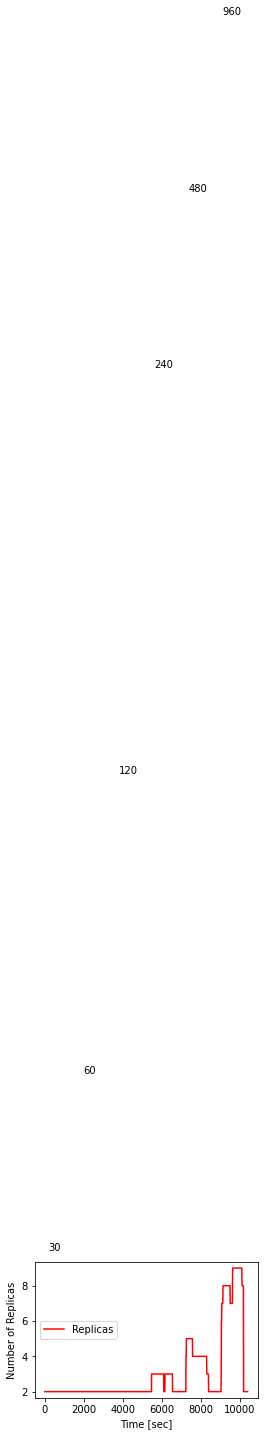

In [14]:
fig, ax1 = plt.subplots(figsize=figure_size)


# ax2 = plt.gca().twinx()
# ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['desiredreplicas'], label='Desired', ls='--', linewidth=2, color='green')
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['currentreplicas'], label='Replicas', ls='-', color='red')
ax1.legend(loc=6)
ax1.set_ylabel('Number of Replicas')
# ax2.text(ax2.get_xlim()[0], ax2.get_ylim()[1]*.9, '(b)')

y_values = 10,20,37,60,70,80
for idr, num_clients in enumerate([30, 60, 120, 240, 480, 960]):  #, 1920
    plt.text(text_indices[idr]-700, y_values[idr], f'{num_clients}')

plt.xlabel('Time [sec]')

plt.tight_layout()
xticks = plt.xticks()
# plt.xticks([(x - start).total_seconds() for x in replicas_time['time']], 
#            [str((x - start)) for x in replicas_time['time']])
for fig_format in figure_formats:
    plt.savefig(f'../figures/replicas.{fig_format}')
plt.show()

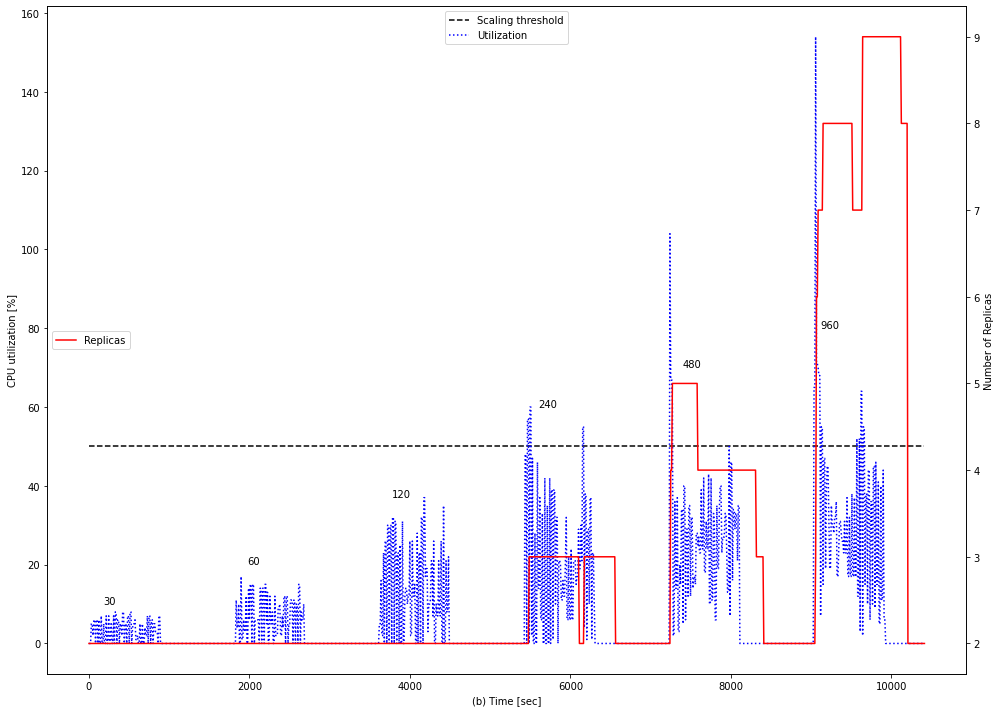

In [15]:
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            [50 for x in replicas_time['utilization']], 
            label='Scaling threshold', ls='--', color='black')
ax1.plot([(x - start).total_seconds() for x in replicas_time['time']], 
            replicas_time['utilization'], 
            label='Utilization', ls=':', color='blue')

text_indices = [30+881-30, 1835+2676-1835, 3619+4481-3619, 5435+6296-5435, 7240+8102-7240, 8950+9898-9036]

y_values = 10,20,37,60,70,80
for idr, num_clients in enumerate([30, 60, 120, 240, 480, 960]):  #, 1920
    plt.text(text_indices[idr]-700, y_values[idr], f'{num_clients}')

plt.xlabel('(b) Time [sec]')
ax1.set_ylabel('CPU utilization [%]')
ax1.legend(loc=9)

ax2 = plt.gca().twinx()
# ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['desiredreplicas'], label='Desired', ls='--', linewidth=2, color='green')
ax2.plot([(x - start).total_seconds() for x in replicas_time['time']], replicas_time['currentreplicas'], label='Replicas', ls='-', color='red')
ax2.legend(loc=6)
ax2.set_ylabel('Number of Replicas')
# ax2.text(ax2.get_xlim()[0], ax2.get_ylim()[1]*.9, '(b)')

plt.tight_layout()
xticks = plt.xticks()
# plt.xticks([(x - start).total_seconds() for x in replicas_time['time']], 
#            [str((x - start)) for x in replicas_time['time']])
# for fig_format in figure_formats:
#     plt.savefig(f'../figures/load_vs_replicas.{fig_format}')
plt.show()